In [1]:
import pandas as pd
import numpy as np
import re
import string
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix
from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,SpatialDropout1D,Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-disaster-prediction-dataset/master/train.csv')

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df.shape

(7613, 5)

In [5]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


### Exploratory data analysis

In [7]:
plt.rcParams['figure.figsize']=(15,5)
plt.rcParams['figure.dpi']=120

C:\Users\Akhlesh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


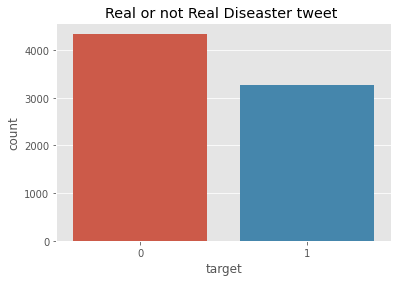

In [8]:
sns.countplot('target',data=df)
plt.title("Real or not Real Diseaster tweet ")
plt.show()

In [9]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<AxesSubplot:ylabel='target'>

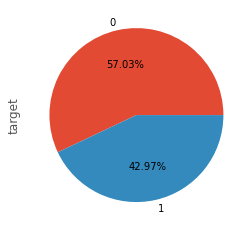

In [11]:
df['target'].value_counts().plot.pie(autopct='%1.2f%%')

### Number of character distribution in the tweets

In [12]:
import warnings
warnings.filterwarnings('ignore')
import preprocess_kgptalkie as kgp

In [13]:
df=kgp.get_basic_features(df)

<AxesSubplot:xlabel='char_counts', ylabel='Density'>

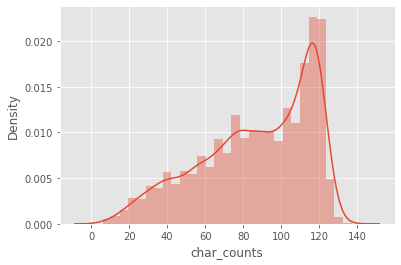

In [14]:
sns.distplot(df['char_counts'])

<AxesSubplot:xlabel='char_counts', ylabel='Density'>

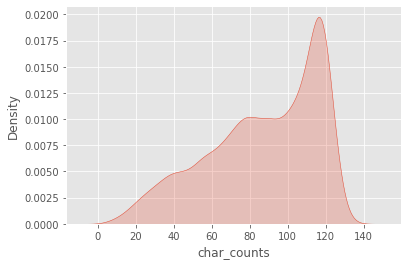

In [15]:
sns.kdeplot(df['char_counts'],shade=True)

<AxesSubplot:xlabel='char_counts', ylabel='Density'>

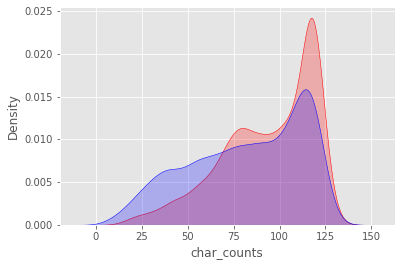

In [16]:
sns.kdeplot(df[df['target']==1]['char_counts'],shade=True,color='red')
sns.kdeplot(df[df['target']==0]['char_counts'],shade=True,color='blue')

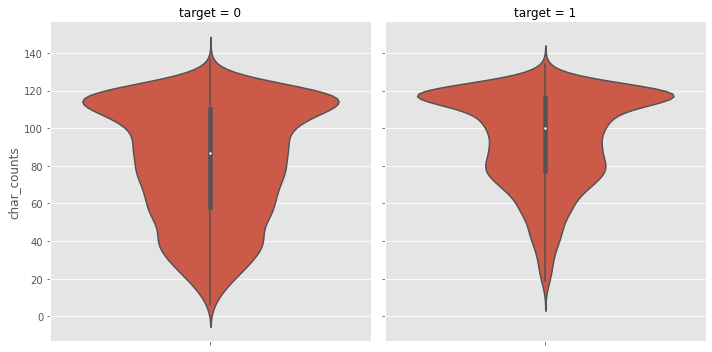

In [17]:
sns.catplot(y='char_counts',data=df,kind='violin',col='target')

### Number of words ,Average Words Length,and Stop words Distribution in the tweets data

<AxesSubplot:xlabel='word_counts', ylabel='Density'>

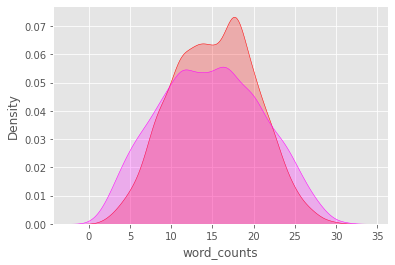

In [18]:
sns.kdeplot(df[df['target']==1]['word_counts'],shade=True,color='red')
sns.kdeplot(df[df['target']==0]['word_counts'],shade=True,color='magenta')

<AxesSubplot:xlabel='avg_wordlength', ylabel='Density'>

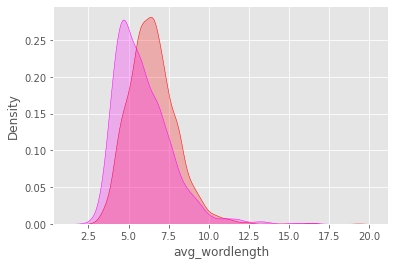

In [19]:
sns.kdeplot(df[df['target']==1]['avg_wordlength'],shade=True,color='red')
sns.kdeplot(df[df['target']==0]['avg_wordlength'],shade=True,color='magenta')

<AxesSubplot:xlabel='stopwords_counts', ylabel='Density'>

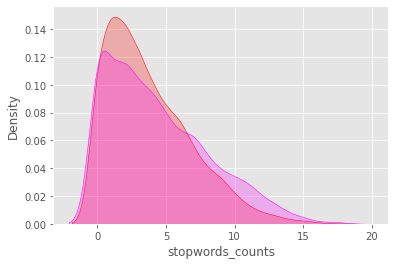

In [20]:
sns.kdeplot(df[df['target']==1]['stopwords_counts'],shade=True,color='red')
sns.kdeplot(df[df['target']==0]['stopwords_counts'],shade=True,color='magenta')

### Most and least common words 

In [21]:
freqs=kgp.get_word_freqs(df,'text')

In [22]:
top20=freqs[:20]

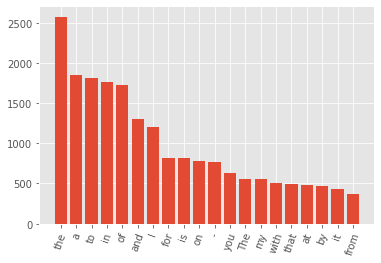

In [23]:
plt.bar(top20.index,top20.values)
plt.xticks(rotation=70)
plt.show()

In [24]:
least20=freqs[-20:]

In [25]:
least20

http://t.co/JD7rIK7fX0     1
ft.åÊM.O.P.                1
http://t.co/ZDTz3RbS6w     1
'Detonate.'                1
@ApolloBrown's             1
PLAY                       1
missed.                    1
detonate&amp;Shots         1
succeed                    1
marines                    1
@BBCTalkback               1
@rfcgeom66                 1
@tomfromireland            1
@SourMashNumber7           1
#FIYA!                     1
https://t.co/NlJVP3Vfyz    1
(Ft.                       1
Dix                        1
bandolier                  1
http://t.co/YmY4rSkQ3d     1
dtype: int64

In [26]:
bigram=kgp.get_ngram(df,'text',ngram_range=2)

In [27]:
bigram

[('ûówe work', 68495),
 ('ûótech business', 68494),
 ('ûónegligence and', 68493),
 ('ûókody vine', 68492),
 ('ûóher upper', 68491),
 ('ûó wallybaiter', 68490),
 ('ûó the', 68489),
 ('ûó stories', 68488),
 ('ûó rt', 68487),
 ('ûó richmond', 68486),
 ('ûó organizers', 68485),
 ('ûó oh', 68484),
 ('ûó now', 68483),
 ('ûó lol', 68482),
 ('ûó integrates', 68481),
 ('ûó https', 68480),
 ('ûó hiroshima', 68479),
 ('ûó head', 68478),
 ('ûó eh', 68477),
 ('ûó desolation', 68476),
 ('ûó bulletproof', 68475),
 ('ûó britain', 68474),
 ('ûó bbc', 68473),
 ('ûó and', 68472),
 ('ûó an', 68471),
 ('ûòåêcnbc http', 68470),
 ('ûòthe united', 68469),
 ('ûò800000 fatalities', 68468),
 ('ûò ûïdetonate', 68467),
 ('ûò your', 68466),
 ('ûò vladimir', 68465),
 ('ûò video', 68464),
 ('ûò usa', 68463),
 ('ûò two', 68462),
 ('ûò those', 68461),
 ('ûò the', 68460),
 ('ûò steve', 68459),
 ('ûò skyåênews', 68458),
 ('ûò residents', 68457),
 ('ûò part', 68456),
 ('ûò news', 68455),
 ('ûò musicians', 68454),
 ('ûò mo

### One shot data cleaning

In [28]:
def get_clean(x):
    x=str(x).lower().replace('\\',' ').replace('_',' ').replace('.',' ')
    x=kgp.cont_exp(x)
    x=kgp.remove_emails(x)
    x=kgp.remove_urls(x)
    x=kgp.remove_html_tags(x)
    x=kgp.remove_rt(x)
    x=kgp.remove_accented_chars(x)
    x=kgp.remove_special_chars(x)
    x=kgp.remove_dups_char(x)
    return x

In [29]:
df['text']=df['text'].apply(lambda x:get_clean(x))

In [30]:
df.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0


# Diseaster words visualization with word cloud 

In [31]:
real=kgp.get_word_freqs(df[df['target']==1],'text')
real=" ".join(real.index)
real

'httpt the in of a to and is on for i at by from it that with not you after this fire are was as have my news httpst over up more via disaster an were be people california suicide has no police who but when been killed like do 2 will just hiroshima than so out fires storm crash families we train now about into emergency s your buildings bomb there all what two mh370 attack am nuclear they wildfire video accident get new one bombing how prime minister northern burning legionnaires dead me bomber homes some if car war still atomic obama he fatal years off may us collapse forest retweet city watch debris malaysia first today 1 japan or man latest mass severe near water had earthquake before those confirmed found oil would down 70 spill floods army world home under warning 4 could injured wreckage weather derailment outbreak 3 evacuation being saudi thunderstorm migrants 40 our old flood missing flooding can during say investigators their time bridge back mosque death suspect state her cha

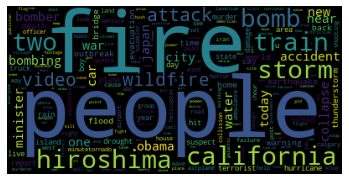

In [32]:
word_cloud=WordCloud(max_font_size=100).generate(real)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [33]:
#not real
nreal=kgp.get_word_freqs(df[df['target']==0],'text')
nreal=" ".join(nreal.index)
nreal

'the httpt i a to and of is in you my it for not on that with this have be am httpst are do me out your like so by at just was but will up all he if from new as get they has or we no when now about what would an how one can there body people 2 via her been his into video more loud us love know back time why got off them emergency full see after who day 3 youtube going cannot did still some fire let good go she had want think laughing man should our ass over retweet world then way life their first youre work last too burning need make only really news than god because being many much here even best take content could help wreck him say 5 right were its black feel great today please hot every fucking 4 look im never down 1 fear cross ever before bags read top fuck oh does night bag without reddit come these everyone another getting any year death panic ruin head liked screaming bloody shit may u always smoke bad wrecked harm buildings most w coming well crash explode disaster face school

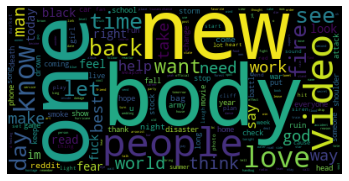

In [34]:
word_cloud=WordCloud(max_font_size=100).generate(nreal)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [35]:
#Creating the independent and the dependent feature
X=df['text']
y=df['target']

In [36]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(X)

In [37]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
#splitting the dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
print(x_train.shape)
print(x_test.shape)

(6090, 22545)
(1523, 22545)


In [39]:
from sklearn.svm import LinearSVC
clf=LinearSVC()
def run_svm(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print()
    print("Classification Report")
    print(classification_report(y_test,y_pred))

In [40]:
run_svm(clf,x_train,x_test,y_train,y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       869
           1       0.83      0.69      0.75       654

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



In [41]:
#prediction on the test data
x='there is fire in the forest'
x=get_clean(x)
print(x,clf.predict(tfidf.transform([x])))

there is fire in the forest [1]


In [42]:
x='happy new year'
x=get_clean(x)
print(x,clf.predict(tfidf.transform([x])))

happy new year [0]


In [43]:
x='trump threatned with nuclear war'
x=get_clean(x)
print(x,clf.predict(tfidf.transform([x])))

trump threatned with nuclear war [1]


In [44]:
x='government has recently started registration for covid-19 vaccine'
x=get_clean(x)
print(x,clf.predict(tfidf.transform([x])))

government has recently started registration for covid19 vaccine [0]


### classification with word2vec and svm

In [45]:
import spacy
import en_core_web_lg

In [46]:
nlp=en_core_web_lg.load()

In [47]:
x='cat dog'

In [48]:
doc=nlp(x)

In [49]:
for token in doc:
    print(token.vector.shape)

(300,)
(300,)


In [50]:
def get_vector(x):
    doc=nlp(x)
    vec=doc.vector
    return vec

In [51]:
df['vec']=df['text'].apply(lambda x:get_vector(x))

In [52]:
df.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,vec
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1,"[-0.8476947, 0.8888447, -3.10391, 0.090650745,..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0,"[-0.35491997, -1.5415528, -2.0926642, -0.49523..."
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0,"[-2.8959212, 0.6998072, -2.5640087, 1.2561336,..."
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0,"[-2.3889112, -0.6061475, -2.453201, 1.5150287,..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0,"[-0.8628482, -0.2587669, -2.5594664, 0.3031685..."


In [53]:
X=df['vec'].to_numpy()
X=X.reshape(-1,1)

In [54]:
X.shape

(7613, 1)

In [55]:
X=np.concatenate(np.concatenate(X,axis=0),axis=0).reshape(-1,300)

In [56]:
#Creating the independent and the dependent feature
#X=np.concatenate(np.concatenate(X,axis=0),axis=0).reshape(-1,300)
y=df['target']

In [57]:
#splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
print(x_train.shape)
print(x_test.shape)

(6090, 300)
(1523, 300)


In [60]:
from sklearn.svm import LinearSVC
clf=LinearSVC()
def run_svm(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print()
    print("Classification report")
    print(classification_report(y_test,y_pred))

In [61]:
run_svm(clf,x_train,x_test,y_train,y_test)


Classification report
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       869
           1       0.70      0.78      0.74       654

    accuracy                           0.77      1523
   macro avg       0.76      0.77      0.76      1523
weighted avg       0.77      0.77      0.77      1523

